# 캐글 - San Francisco Crime Classification

# https://www.kaggle.com/competitions/sf-crime

# 범죄 분류

## 데이터 설명

- Dates - timestamp of the crime incident
- Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
- Descript - detailed description of the crime incident (only in train.csv)
- DayOfWeek - the day of the week
- PdDistrict - name of the Police Department District
- Resolution - how the crime incident was resolved (only in train.csv)
- Address - the approximate street address of the crime incident 
- X - Longitude
- Y - Latitude

In [4]:
import pandas as pd
import numpy as np

# 1. 캐글 데이터 불러오기

In [5]:
import os

os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

In [6]:
!kaggle competitions download -c sf-crime
!unzip '*.zip'

 81% 33.0M/40.9M [00:00<00:00, 43.2MB/s]
100% 40.9M/40.9M [00:00<00:00, 54.3MB/s]
Archive:  sf-crime.zip
  inflating: sampleSubmission.csv.zip  
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [7]:
train = pd.read_csv('train.csv.zip')
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [8]:
test = pd.read_csv('test.csv.zip')
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [9]:
# train 데이터와 test 데이터 합치기

alldata = pd.concat([train, test])
alldata.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Id
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NaN
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NaN
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,NaN
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,NaN
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,NaN


In [10]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762311 entries, 0 to 884261
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Dates       object 
 1   Category    object 
 2   Descript    object 
 3   DayOfWeek   object 
 4   PdDistrict  object 
 5   Resolution  object 
 6   Address     object 
 7   X           float64
 8   Y           float64
 9   Id          float64
dtypes: float64(3), object(7)
memory usage: 147.9+ MB


# 2. 날짜 칼럼 전처리

In [11]:
# Dates 칼럼 타입 datetime으로 변경
alldata['Dates'] = pd.to_datetime(alldata['Dates'])

# year, month, day, hour, minute 칼럼 추가
alldata['year'] = alldata['Dates'].dt.year
alldata['month'] = alldata['Dates'].dt.month
alldata['day'] = alldata['Dates'].dt.day
alldata['hour'] = alldata['Dates'].dt.hour
alldata['minute'] = alldata['Dates'].dt.minute

alldata.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Id,year,month,day,hour,minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,2015,5,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,NaN,2015,5,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,NaN,2015,5,13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,NaN,2015,5,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,NaN,2015,5,13,23,30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


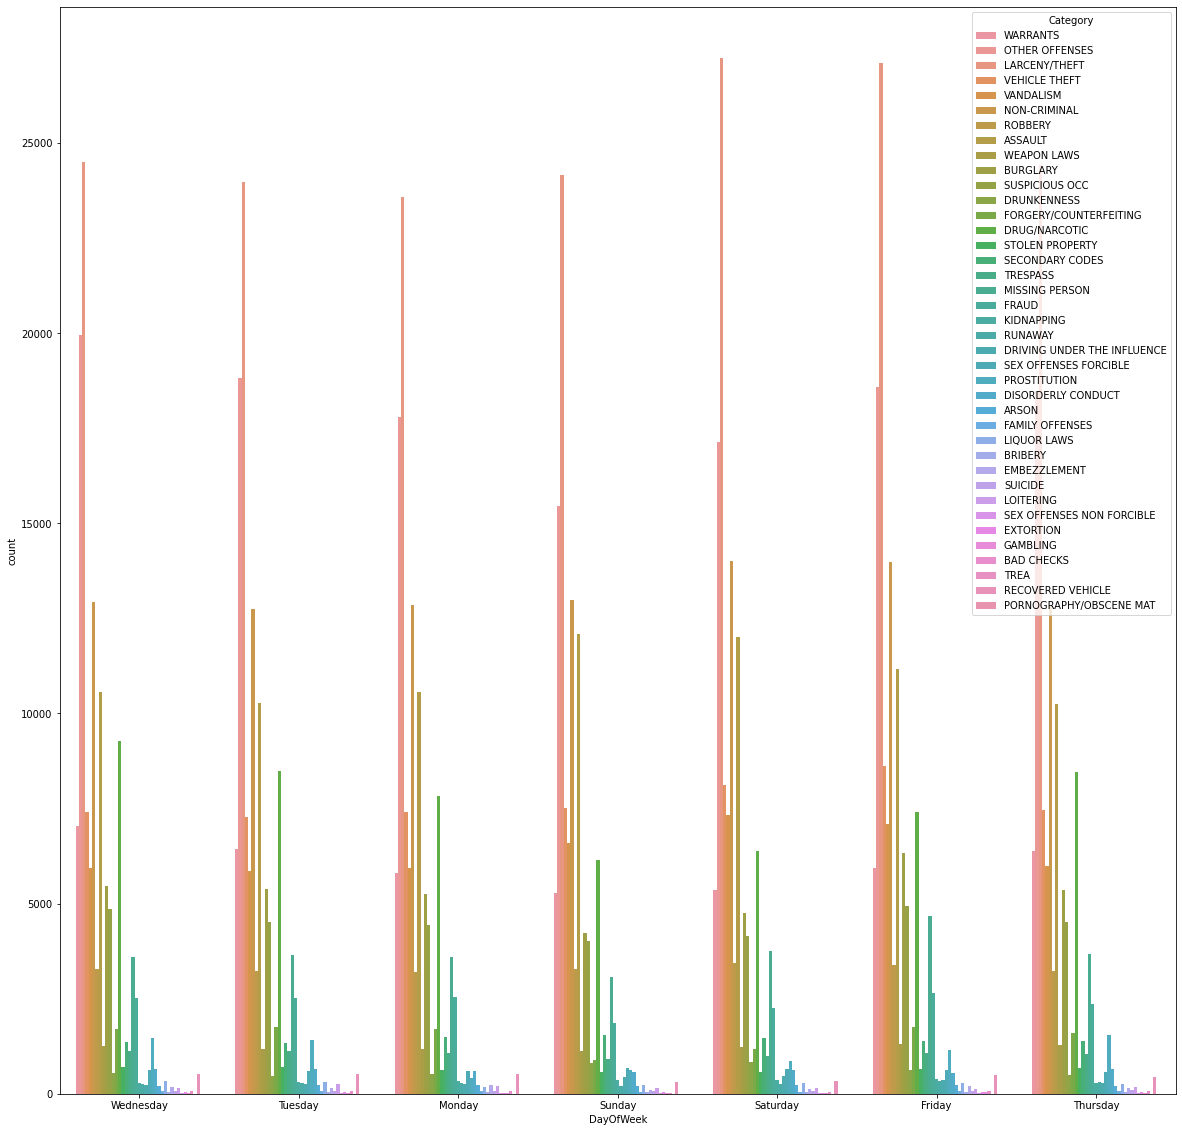

In [12]:
# DayOfWeek 칼럼 유용한지 시각화

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))
sns.countplot(alldata['DayOfWeek'], hue = alldata['Category'])

# 3. 불필요한 칼럼 제거

In [13]:
alldata2 = alldata.drop(columns = ['Dates', 'Category', 'Descript', 'Resolution', 'Id'])
alldata2.head()

,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute
0,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
1,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
2,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33
3,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30
4,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30


# 4. 문자형 칼럼 숫자형으로 변환

In [14]:
from sklearn.preprocessing import LabelEncoder     # 문자형 변수를 숫자로 대체하기 위해 LabelEncoder 사용

le = LabelEncoder()

a = alldata2.columns[alldata2.dtypes == 'object']     # 문자형 칼럼만 선택

for i in a:
  alldata2[i] = le.fit_transform(list(alldata2[i]))     # for반복문을 사용해 모든 문자형 칼럼을 숫자로 변환. 이때 결측값 때문에 오류가 날 수 있으므로 list 처리

alldata2.head()

,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute
0,6,4,20895,-122.425892,37.774599,2015,5,13,23,53
1,6,4,20895,-122.425892,37.774599,2015,5,13,23,53
2,6,4,24169,-122.424363,37.800414,2015,5,13,23,33
3,6,4,4418,-122.426995,37.800873,2015,5,13,23,30
4,6,5,1923,-122.438738,37.771541,2015,5,13,23,30


# 5. 결측치 채우기

In [15]:
alldata2 = alldata2.fillna(-1)

# 6. train2와 test2로 나누기

In [16]:
train2 = alldata2[:len(train)]     # 앞에서부터 train갯수만큼 train2로
test2 = alldata2[len(train):]     # 나머지는 test2로

# 7. train set과 valid set 나누기
- 데이터 용량이 너무 많을 때는 제출하는 데에도 시간이 오래 걸리므로 제출해보는 대신 내부적으로 점수 예측해보는 것이 좋음
- 그러기 위해서 valid set 만들어서 평가해보기

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# stratify = train['Category']는 균등하게 데이터를 뽑아서 train, valid로 나눔. 즉, 정답(0)과 정답 아닌(1)비율을 균등하게 뽑음
x_train, x_valid, y_train, y_valid = train_test_split(train2, train['Category'], test_size = 0.2, random_state = 42, stratify = train['Category'])

# display()는 2개를 동시에 보고 싶을 때 사용.
display(x_train, x_valid)

,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute
42328,2,0,6957,-122.400904,37.752101,2014,10,18,2,30
778286,2,4,17746,-122.430437,37.772107,2004,5,1,0,30
625961,6,3,345,-122.420602,37.762928,2006,6,28,16,45
419817,3,4,14027,-122.425111,37.804146,2009,6,14,22,0
369198,6,9,10382,-122.412899,37.785097,2010,3,24,14,38
...,...,...,...,...,...,...,...,...,...,...
198308,3,7,12681,-122.403405,37.775421,2012,9,23,11,0
296594,6,6,5312,-122.436911,37.787067,2011,4,20,11,50
449101,1,9,6023,-122.414302,37.781863,2009,1,19,6,47
118894,3,7,2979,-122.411340,37.781271,2013,10,6,18,30


,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute
31503,4,7,20464,-122.402070,37.788720,2014,12,11,19,45
8676,6,9,1541,-122.406213,37.786037,2015,4,1,14,28
126061,2,1,10207,-122.404260,37.798116,2013,9,7,2,20
305366,3,7,10378,-122.408437,37.781954,2011,2,27,8,15
463755,6,4,19570,-122.424542,37.801304,2008,10,29,23,9
...,...,...,...,...,...,...,...,...,...,...
698485,2,4,2902,-122.425779,37.782319,2005,6,18,1,10
874375,6,4,16659,-122.431579,37.777700,2003,1,22,5,40
510136,4,6,10806,-122.505357,37.775293,2008,3,6,13,30
724321,5,1,14348,-122.403865,37.798223,2005,2,8,22,30


# 8. 모델링(모델 불러오기, 모델 선언, 학습, 결과 예측)
- 부스팅모델 사용(부스팅모델은 과대적합 될 수 있으므로 하이퍼파라미터를 잘 적용해야 함)
- 카테고리형 data는 부스팅모델이나 배깅모델(RandomForest) 둘 중 하나 사용하는 것이 좋음
- 카테고리형 칼럼이 많고 이 대회에서는 address가 매우 중요한 칼럼인데 이 address 칼럼에 변수들의 종류가 매우 많음. 이럴 때는 CatBoost모델이 적합
- 데이터 용량이 많으므로 GPU사용
- 캐글 내 노트북에서는 오른쪽 화면 settings에서 accelerator를 GPU로 변경한 뒤 아래 코드에서 task_type = 'GPU' 써야 함

In [19]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(verbose = 10, task_type = 'GPU')     # verbose = 10으로 해서 결과 나오는 과정을 10번에 1번씩만 나오게 조정. gpu사용하므로 task_type = 'GPU' 추가
cb.fit(x_train, y_train, eval_set = (x_valid, y_valid))     # cb.fit에 x_train, y_train, eval_set=(x_valid, y_valid) 추가해서 점수 예측
                                                            # 이 코드를 추가하면 결과에서 test: xxxx, best: xxxx 이런 값들이 나옴. 이 값들이 최종 제출 후 leader board 점수와 유사
result = cb.predict_proba(test2)
result

Learning rate set to 0.203863
0:	learn: 3.0194081	test: 3.0203904	best: 3.0203904 (0)	total: 157ms	remaining: 2m 36s
10:	learn: 2.4567411	test: 2.4594839	best: 2.4594839 (10)	total: 1.39s	remaining: 2m 5s
20:	learn: 2.3981299	test: 2.4033732	best: 2.4033732 (20)	total: 3.23s	remaining: 2m 30s
30:	learn: 2.3734096	test: 2.3804063	best: 2.3804063 (30)	total: 5.23s	remaining: 2m 43s
40:	learn: 2.3567975	test: 2.3657352	best: 2.3657352 (40)	total: 7.13s	remaining: 2m 46s
50:	learn: 2.3434199	test: 2.3544536	best: 2.3544536 (50)	total: 8.96s	remaining: 2m 46s
60:	learn: 2.3329933	test: 2.3456493	best: 2.3456493 (60)	total: 10.7s	remaining: 2m 44s
70:	learn: 2.3215128	test: 2.3357232	best: 2.3357232 (70)	total: 12.7s	remaining: 2m 45s
80:	learn: 2.3126515	test: 2.3285259	best: 2.3285259 (80)	total: 14.8s	remaining: 2m 47s
90:	learn: 2.3039159	test: 2.3223471	best: 2.3223471 (90)	total: 16.8s	remaining: 2m 48s
100:	learn: 2.2978170	test: 2.3178944	best: 2.3178944 (100)	total: 18.6s	remaining:

array([[1.05659894e-03, 5.51072199e-02, 3.57717349e-06, ...,
        2.99643856e-01, 3.09950142e-02, 1.18307064e-02],
       [4.82245060e-04, 6.28203178e-02, 4.78022441e-07, ...,
        8.23159961e-03, 9.14254063e-02, 3.21064857e-02],
       [1.55216060e-02, 1.43503171e-01, 4.43668456e-05, ...,
        2.80183537e-02, 2.63078476e-02, 5.37798071e-03],
       ...,
       [4.14585763e-04, 7.53940292e-02, 5.92106151e-04, ...,
        2.73844541e-02, 6.31885917e-03, 1.23657895e-03],
       [1.66972123e-03, 5.99899686e-02, 9.93485919e-04, ...,
        3.48262145e-02, 1.45525552e-02, 2.57757323e-03],
       [2.30076266e-04, 2.40096797e-02, 5.60562754e-03, ...,
        2.40267394e-02, 5.11828317e-03, 5.65016898e-04]])

- 최종적으로 bestTest값이 2.2550이 나왔는데 실제로 제출했을 때 leader board 점수도 이와 유사함 

# 9. 캐글에 제출

In [21]:
# 제출 양식 불러오기

sub = pd.read_csv('sampleSubmission.csv.zip')
sub

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884258,884258,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884259,884259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884260,884260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# 제출양식에 결과 포함시키기

sub.iloc[:, 1:] = result     # 다중분류대회이므로 sub.iloc[:, 1:] = result
sub

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.001057,0.055107,3.577173e-06,0.000786,0.067310,0.001476,0.002481,0.013259,0.002986,...,8.760498e-07,0.011541,0.000148,0.069215,8.086242e-06,0.002197,0.042823,0.299644,0.030995,0.011831
1,1,0.000482,0.062820,4.780224e-07,0.000302,0.005318,0.003463,0.003349,0.087490,0.006200,...,6.329616e-07,0.004509,0.000070,0.041341,4.899290e-06,0.002028,0.021730,0.008232,0.091425,0.032106
2,2,0.015522,0.143503,4.436685e-05,0.000706,0.094695,0.000553,0.000781,0.011673,0.011556,...,3.503036e-06,0.004389,0.000031,0.047764,1.221953e-07,0.018948,0.100749,0.028018,0.026308,0.005378
3,3,0.000997,0.185670,4.325249e-07,0.001011,0.020544,0.004503,0.002667,0.032795,0.011373,...,5.103486e-05,0.008965,0.000011,0.050341,1.370351e-06,0.007377,0.075666,0.161383,0.029567,0.025937
4,4,0.000997,0.185670,4.325249e-07,0.001011,0.020544,0.004503,0.002667,0.032795,0.011373,...,5.103486e-05,0.008965,0.000011,0.050341,1.370351e-06,0.007377,0.075666,0.161383,0.029567,0.025937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0.000595,0.069414,1.145884e-02,0.000009,0.020062,0.001621,0.001548,0.009494,0.000441,...,1.624086e-03,0.010013,0.000038,0.110730,9.611258e-08,0.006183,0.038714,0.021867,0.010862,0.000874
884258,884258,0.000415,0.055158,1.958333e-03,0.000001,0.070522,0.004584,0.000089,0.001479,0.001079,...,4.799036e-05,0.009676,0.000034,0.128780,9.514982e-08,0.008149,0.040472,0.016709,0.007007,0.000155
884259,884259,0.000415,0.075394,5.921062e-04,0.000146,0.007346,0.000079,0.000003,0.005035,0.000174,...,2.289315e-02,0.005370,0.000018,0.036636,5.265555e-07,0.002437,0.026015,0.027384,0.006319,0.001237
884260,884260,0.001670,0.059990,9.934859e-04,0.000004,0.051538,0.016926,0.000022,0.007173,0.000147,...,2.198454e-03,0.005399,0.000052,0.082732,3.240473e-07,0.004326,0.015784,0.034826,0.014553,0.002578


In [23]:
# 결과물울 csv파일로 저장

sub.to_csv('sub.csv', index = 0)     # index 불포함

### 등수
- catboost 모델 사용한 베이스라인: 568/2331
- 날짜 칼럼 추가: 162/2331